In [41]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import pandas as pd


In [7]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
    return result

In [3]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

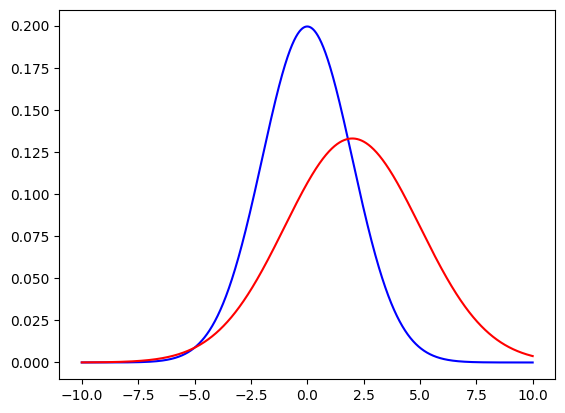

In [4]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [8]:
kl(p, q)

np.float64(349.91348337868124)

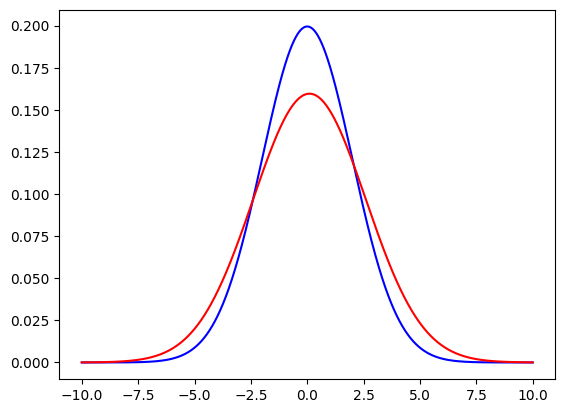

In [9]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [10]:
kl(p, q)

np.float64(43.94620233653506)

In [15]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

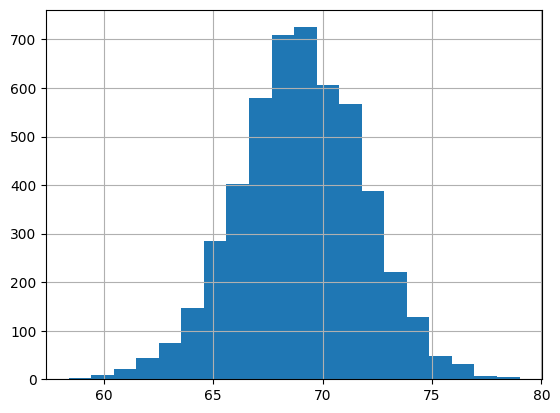

In [22]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=20)

In [23]:
males.describe()

count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64

In [25]:
males.describe()['mean']


np.float64(69.02634590621741)

In [26]:
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [28]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(ideal)

[70.26771686 63.47875111 70.45326357 ... 69.68369326 69.26337193
 70.19506355]


In [31]:
icount, idevision = np.histogram(ideal, bins=100)
print(icount)
print(idevision)

[  2   4   1   1   3   7   1   3   5   3   8   7   7  13  13  20  14  20
  20  19  20  25  37  33  41  35  48  60  48  58  66  64  88  84  85  87
  98  81  84 122 115 114 118 139 119 106 133 127 131 129 133 100 123 140
 126 112 117 109  81 111  88  96  82  75  75  83  71  70  67  40  50  37
  52  36  21  30  28  31  23  19  18  12   7  10  11   8   3   4   8   6
   4   6   5   1   3   1   0   0   0   1]
[60.20003387 60.38024271 60.56045155 60.7406604  60.92086924 61.10107808
 61.28128692 61.46149576 61.6417046  61.82191344 62.00212228 62.18233112
 62.36253996 62.5427488  62.72295764 62.90316648 63.08337533 63.26358417
 63.44379301 63.62400185 63.80421069 63.98441953 64.16462837 64.34483721
 64.52504605 64.70525489 64.88546373 65.06567257 65.24588141 65.42609026
 65.6062991  65.78650794 65.96671678 66.14692562 66.32713446 66.5073433
 66.68755214 66.86776098 67.04796982 67.22817866 67.4083875  67.58859634
 67.76880519 67.94901403 68.12922287 68.30943171 68.48964055 68.66984939
 68.850058

In [32]:
kl(count, icount)

C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))


np.float64(248.31466183661934)

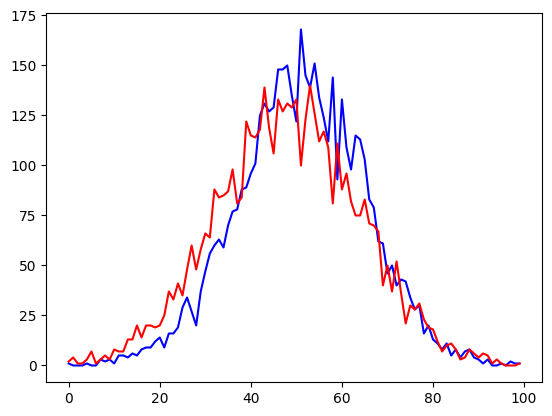

In [33]:
plt.plot(count, c='blue')
plt.plot(icount, c= 'red')

In [34]:
np.sum(count)

np.int64(5000)

In [35]:
np.sum(icount)

np.int64(5000)

In [38]:
count = count/5000
icount = icount/5000

In [39]:
kl(count, icount)

C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))
C:\Users\amir\AppData\Local\Temp\ipykernel_11032\1017170297.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p !=0, q != 0), p * np.log(p/q), 0))


np.float64(-0.0004503081219141851)

In [44]:
idealp = poisson.rvs(males.describe()['mean'])
ipcount, ipdevision = np.histogram(idealp, bins=100)

In [45]:
np.sum(ipcount)

np.int64(1)

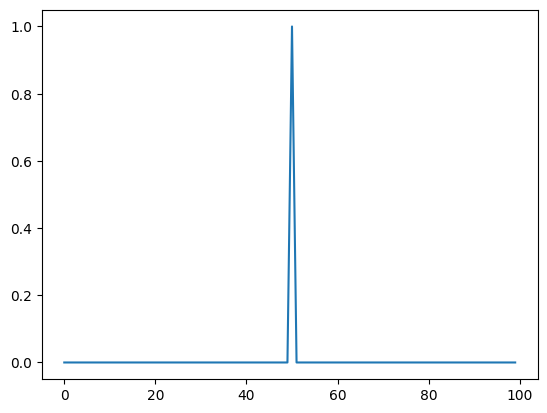

In [46]:
plt.plot(ipcount)